# Simple implementation of Simple Traffic Light Segmentation Neural Net



# Datasets

I will create a dataset of generic shapes and train the neural net to segment the images first by colour and then by shapes.


## Colour data set

In [1]:
import numpy as np
import pandas as pd
import re


# Show images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

import random

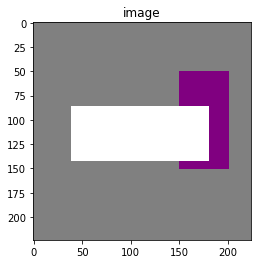

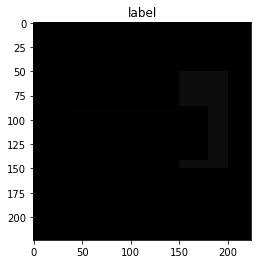

Image size (224, 224, 3)


In [68]:
class TrainingImage:
    """ 
    This class handles the creation of training
    images and the associated label image
    """
    #Colors classes    
    BLACK_CLASS = 0
    WHITE_CLASS = 1
    RED_CLASS = 2
    LIME_CLASS = 3
    BLUE_CLASS = 4
    YELLOW_CLASS = 5
    CYAN_CLASS = 6
    MAGENTA_CLASS = 7
    SILVER_CLASS = 8
    GRAY_CLASS = 9
    MAROON_CLASS = 10
    OLIVE_CLASS = 11
    GREEN_CLASS = 12
    PURPLE_CLASS = 13
    TEAL_CLASS = 14
    NAVY_CLASS = 15
    
    COLOR = {
        BLACK_CLASS : (0,0,0),
        WHITE_CLASS : (255,255,255),
        RED_CLASS : (255,0,0),
        LIME_CLASS : (0,255,0),
        BLUE_CLASS : (0,0,255),
        YELLOW_CLASS : (255,255,0),
        CYAN_CLASS : (0,255,255),
        MAGENTA_CLASS : (255,0,255),
        SILVER_CLASS : (192,192,192),
        GRAY_CLASS : (128,128,128),
        MAROON_CLASS : (128,0,0),
        OLIVE_CLASS : (128,128,0),
        GREEN_CLASS : (0,128,0),
        PURPLE_CLASS : (128,0,128),
        TEAL_CLASS : (0,128,128),
        NAVY_CLASS : (0,0,128),
    }
    
    def __init__(self, size=(224,224, 3), backgd_color_class=BLACK_CLASS):
        self.size = size
        self.createImageBackground(backgd_color_class)
        
    def clear(self):
        self.image = np.zeros(self.size, dtype=np.uint8)
        self.label = np.zeros(self.size[0:2] + (len(TrainingImage.COLOR.keys()), ) , dtype=np.uint8)
        
    def createImageBackground(self, backgd_color_class):
        self.backgd_color_class = backgd_color_class
        self.clear()
        for channel in range(0, 3):
            self.image[:,:,channel] = TrainingImage.COLOR[self.backgd_color_class][channel]
        self.label[:,:, self.backgd_color_class] = self.backgd_color_class
    
    def createRectangle(self, pt1, pt2, color_class=WHITE_CLASS):
        cv2.rectangle(self.image, 
                      pt1[::-1], pt2[::-1], TrainingImage.COLOR[color_class], thickness=cv2.FILLED)
        self.label[pt1[0]:pt2[0],pt1[1]:pt2[1]] =  color_class
        
    def addRandRectangle(self, color_class=WHITE_CLASS):
        image_size = self.image.shape
        pt1 = (random.randint(0, 150), random.randint(0, 100))
        pt2 = (random.randint(pt1[0]+50, image_size[0]-1), random.randint(pt1[1]+50, image_size[1]-1))
        self.createRectangle( pt1, pt2, color_class=color_class)

image_size = (224,224, 3)
trainim = TrainingImage(size=image_size , backgd_color_class=TrainingImage.GRAY_CLASS)
trainim.createRectangle( (50,150) , (150,200), color_class=TrainingImage.PURPLE_CLASS)
trainim.addRandRectangle()

# Plot background 
plt.imshow(trainim.image)
plt.title('image')
plt.show()

# Plot background 
plt.imshow(trainim.label[:,:,11:14])
plt.title('label')
plt.show()

print('Image size {}'.format(trainim.image.shape))

In [40]:
# Generate color training dataset
from functools import reduce


NUM_TRAIN = 512
image_size = (224,224, 3)
size_in_memory = 1
image_mem = reduce(lambda a,b : a*b ,image_size, 1)
num_classes = len(TrainingImage.COLOR.keys())
total_train_mem = NUM_TRAIN * image_mem
print('Total size of the use of memory : {}MB'.format(total_train_mem/(1024*1024)))

X_TRAIN_SIZE = (NUM_TRAIN,) + image_size
Y_TRAIN_SIZE = (NUM_TRAIN,) + image_size[0:2] + (num_classes, )
X_train = np.zeros(X_TRAIN_SIZE, dtype=np.uint8)
y_train = np.zeros(Y_TRAIN_SIZE, dtype=np.uint8)

trainim = TrainingImage(size=image_size)

for i in range(NUM_TRAIN):
    trainim.createImageBackground(TrainingImage.BLACK_CLASS)
    trainim.addRandRectangle(color_class=TrainingImage.WHITE_CLASS)
    X_train[i] = trainim.image
    y_train[i] = trainim.label



Total size of the use of memory : 73.5MB


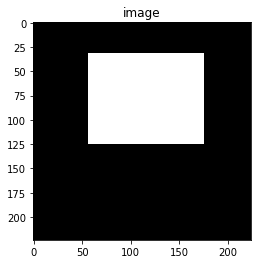

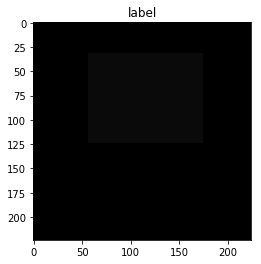

In [41]:
# Generate color evaluation dataset


# Plot background 
plt.imshow(X_train[2])
plt.title('image')
plt.show()

# Plot background 
plt.imshow(y_train[2,:,:,11:14]*10)
plt.title('label')
plt.show()


# Generate color test dataset



In [42]:
# def generator(steps_per_epoch = 200):
    

#     # Load ground truth training dataset
#     # TODO
    
#     # Compute batch dimensions
#     batch_size = len(image_db)//steps_per_epoch
#     print('batch_size:',batch_size)
    
#     batch_idx = 0
#     continue_running = True
    
    
#     while continue_running:
#         image_X = []
#         label_image_y = []
        
#         for _ in range(len(image_db)):)

#             label_image_y.append(label_image)
#             image_X.append( image_train )
                
                
#             if batch_idx >= batch_size :
#                 X = np.array(image_X).astype(np.uint8)
#                 y = np.array(label_image_y).astype(np.uint8)
#                 image_X = []
#                 label_image_y = []
#                 batch_idx = 0
#                 yield (X, y)
            
        #continue_running = False
    #return (image_X, segmented_image, label_image)


# Model
The original paper uses VGG for implementing the detector.


TODO : Will try experimenting with Xception and MobileNet  
https://keras.io/applications/#usage-examples-for-image-classification-models


In [24]:
# Extract features from an arbitrary intermediate layer with VGG19

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3),pooling=None, include_top=False)


print('Pre-trained model loaded.')

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()


Pre-trained model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)  

In [25]:
# Get input dimensions
input_height = base_model.layers[0].input_shape[1]
input_width = base_model.layers[0].input_shape[2]

In [33]:
# Extract pooling layers out of VGG-16
num_classes = len(TrainingImage.COLOR.keys())


from keras.layers import Dense, Conv2D, UpSampling2D, Activation
from keras.layers import Conv2DTranspose, Add, Flatten, Lambda
from keras.layers import BatchNormalization, Reshape, Permute, Dropout
from keras import backend as K
from keras import regularizers

# Layer 5
layer_5_1x1 = Conv2D(num_classes, 1, padding='same', name='convpool_5_1x1',
               activation='selu')(base_model.get_layer('block5_pool').output)

up_layer_5 = Conv2DTranspose(num_classes, (3, 3), activation='selu',
                            padding='same', strides=(2,2)  )(layer_5_1x1)

#up_layer_5_bn = BatchNormalization(axis=3, name='up_layer_5_bn')(up_layer_5)

# Layer 4
layer_4_1x1 = Conv2D(num_classes, 1, padding='same', name='convpool_4_1x1',
               activation='selu')(base_model.get_layer('block4_pool').output)

merge_4_and_5 = Add()([up_layer_5, layer_4_1x1])


up_layer_4_and_5 = Conv2DTranspose(num_classes, (3, 3), activation='selu',
                            padding='same', strides=(2,2))(merge_4_and_5)

up_layer_4_and_5 = BatchNormalization(axis=3, name='up_layer_4_and_5_bn')(up_layer_4_and_5)

# Layer 3
layer_3_1x1 = Conv2D(num_classes, 1, padding='same', name='convpool_3_1x1',
               activation='selu')(base_model.get_layer('block3_pool').output)

merge_3_to_5 = Add()([up_layer_4_and_5, layer_3_1x1])

up_layer_3_to_5 = Conv2DTranspose(num_classes, (3, 3), activation='selu',
                            padding='same', strides=(2,2)  )(merge_3_to_5)



# Layer 2
layer_2_1x1 = Conv2D(num_classes, 1, padding='same', name='convpool_2_1x1',
               activation='selu')(base_model.get_layer('block2_pool').output)

merge_2_to_5 = Add()([up_layer_3_to_5, layer_2_1x1])



up_layer_2_to_5 =Conv2DTranspose(num_classes, (3, 3), 
                                      activation='selu',
                            padding='same', strides=(2,2) ,
                                      name='up_layer_2_to_5')(merge_2_to_5)


up_layer_2_to_5 = BatchNormalization(axis=3, 
                                        name='up_layer_2_to_5_bn')(up_layer_2_to_5)

# Layer 1
layer_1_1x1 = Conv2D(num_classes, 1, padding='same', name='convpool_1_1x1',
               activation='selu')(base_model.get_layer('block1_pool').output)

layer_1_1x1 = Dropout(0.95)(layer_1_1x1)

merge_1_to_5 = Add()([up_layer_2_to_5, layer_1_1x1])

up_layer_1_to_5 =Conv2DTranspose(num_classes, (3, 3), 
                                      activation='selu',
                            padding='same', strides=(2,2) ,
                                      name='final_up')(merge_1_to_5)





def depth_softmax(matrix):
    sigmoid = lambda x: 1 / (1 + K.exp(-x))
    sigmoided_matrix = sigmoid(matrix)
    sum_sig = K.sum(sigmoided_matrix, axis=3)
    sum_sig_reshaped = K.reshape(sum_sig,(-1,input_height,input_height,1))
    repeat = num_classes
    sum_sigmoided_repeated = K.repeat_elements(sum_sig_reshaped, repeat, axis=3)
    softmax_matrix = sigmoided_matrix / sum_sigmoided_repeated
    return softmax_matrix


seg_out = Lambda(depth_softmax, name='seg_out')(up_layer_1_to_5)

# Build a classifier model to put on top of the convolutional model

model = Model(inputs=base_model.input, outputs=seg_out)



from keras.utils import plot_model
plot_model(model, to_file='model.png')

#for i in model.layers:
#    print(i.trainable)

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 224, 224, 64)  1792        input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Conv2D)            (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [61]:
from keras import optimizers
optimizer_selected = optimizers.Adam(lr=1e-3)

model.compile(optimizer=optimizer_selected, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#model.compile(optimizer=optimizers.SGD(lr=100), loss=dice_coef_loss, metrics=[dice_coef])

steps_per_ep = 10
history = model.fit(x=X_train, y=y_train, batch_size=10, epochs=2, verbose=1, callbacks=None, 
                    validation_split=0.0, validation_data=None, shuffle=True,
                    class_weight=None, sample_weight=None, initial_epoch=0,
                    steps_per_epoch=None, validation_steps=None)


Epoch 1/2
512/512 [==============================] - 7s - loss: 10.1280 - categorical_accuracy: 0.1168     
Epoch 2/2
512/512 [==============================] - 6s - loss: 10.0723 - categorical_accuracy: 0.1163     


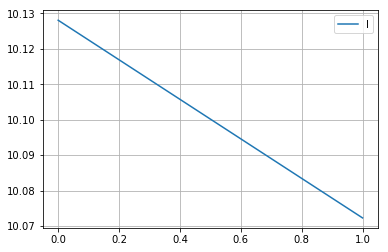

In [62]:
# Plot loss function
plt.plot(history.epoch,history.history['loss'])
plt.legend(('loss'))
plt.grid('on')
plt.show()


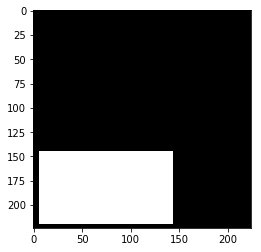

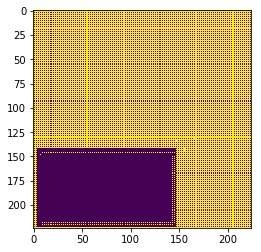

In [71]:
img = X_train[20]
plt.imshow( img)
plt.show()

seg= model.predict(img.reshape(1,224,224,3))

seg = seg.reshape(224,224, num_classes)
plt.imshow( (seg[:,:,0]>seg[:,:,1]))
plt.show()

In [ ]:
image_path = 'bosch/dataset_train_rgb_zip/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/208772.png'

img = cv2.cvtColor( cv2.imread( image_path), cv2.COLOR_BGR2RGB )
img = preprocess_image(img)

plt.imshow( img)
plt.show()

seg= model.predict(img.reshape(1,224,224,3))

seg = seg.reshape(224,224,2)


seg = seg.reshape(224,224,2)
plt.imshow( seg[:,:,0]>seg[:,:,1])
plt.show()

prediction = np.zeros(img.shape, dtype=np.uint8)
print(prediction.shape)
prediction[:,:,2] = ((seg[:,:,0]<seg[:,:,1]).astype(np.uint32) * 300).clip(0,255).astype(np.uint8)

combine_images = (img.astype(np.uint16) + prediction.astype(np.uint16)).clip(0,255).astype(np.uint8)
plt.imshow( combine_images )
plt.show()